#Data Project from Sony Research

#Table of Contents
1. Assignment
2. Exploratory Analysis and Extract Insights
3. Train/Test Split
4. Predictive Model
5. Metrics
6. Model Results
7. Classical Machine Learning Models
8. Deep Learning Model
9. Deployment Issues

#Assignment

1. Perform exploratory analysis and extract insights from the dataset.
2. Split the dataset into train/test sets and explain your reasoning.
3. Build a predictive model to predict which customers are going to churn and discuss the reason why you choose a particular algorithm.
4. Establish metrics to evaluate model performance.
5. Discuss the potential issues with deploying the model into production.

#1. Exploratory Analysis and Extract Insights


In [1]:
import pandas as pd
import numpy as np
# set random seed to have reproducible results
# sklearn uses numpy random seed
np.random.seed(42)

In [3]:
#read dataset
df = pd.read_csv("Data_Science_Challenge.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
# check fundamentals
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [5]:
# see if every row is unique to one customer
df["phone number"].nunique()

3333

In [6]:
# check other uniques
df["area code"].nunique()

3

In [7]:
df["state"].nunique()

51

We will prefer to leave state values out of the dataset in order to not have issues with high dimensionality. We can start to process other categorical features.

In [8]:
area_code_dummies = pd.get_dummies(df["area code"])
area_code_dummies = area_code_dummies.add_prefix('area_code_')
area_code_dummies

,area_code_408,area_code_415,area_code_510
0,False,True,False
1,False,True,False
2,False,True,False
3,True,False,False
4,False,True,False
...,...,...,...
3328,False,True,False
3329,False,True,False
3330,False,False,True
3331,False,False,True


In [9]:
df["voice mail plan"].loc[df["voice mail plan"] == "no"] = 0
df["voice mail plan"].loc[df["voice mail plan"] == "yes"] = 1
df["voice mail plan"] = df["voice mail plan"].astype("int64")
df["voice mail plan"]

<ipython-input-9-d962e98ac474>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["voice mail plan"].loc[df["voice mail plan"] == "no"] = 0
<ipython-input-9-d962e98ac474>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

,voice mail plan
0,1
1,1
2,0
3,0
4,0
...,...
3328,1
3329,0
3330,0
3331,0


In [10]:
df["international plan"].loc[df["international plan"] == "no"] = 0
df["international plan"].loc[df["international plan"] == "yes"] = 1
df["international plan"] = df["international plan"].astype("int64")
df["international plan"]

<ipython-input-10-2856103da030>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["international plan"].loc[df["international plan"] == "no"] = 0
<ipython-input-10-2856103da030>:1: SettingWithCopyWarning: 
A value is trying to be set on a 

,international plan
0,0
1,0
2,0
3,1
4,1
...,...
3328,0
3329,0
3330,0
3331,1


In [11]:
# form final dataset
df_final = df.drop(columns=["phone number", "state", "area code"])
df_final = pd.concat([df_final,area_code_dummies], axis=1)
df_final

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,area_code_408,area_code_415,area_code_510
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,...,91,11.01,10.0,3,2.70,1,False,False,True,False
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,103,11.45,13.7,3,3.70,1,False,False,True,False
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,104,7.32,12.2,5,3.29,0,False,False,True,False
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,89,8.86,6.6,7,1.78,2,False,True,False,False
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,121,8.41,10.1,3,2.73,3,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,0,1,36,156.2,77,26.55,215.5,126,18.32,...,83,12.56,9.9,6,2.67,2,False,False,True,False
3329,68,0,0,0,231.1,57,39.29,153.4,55,13.04,...,123,8.61,9.6,4,2.59,3,False,False,True,False
3330,28,0,0,0,180.8,109,30.74,288.8,58,24.55,...,91,8.64,14.1,6,3.81,2,False,False,False,True
3331,184,1,0,0,213.8,105,36.35,159.6,84,13.57,...,137,6.26,5.0,10,1.35,2,False,False,False,True


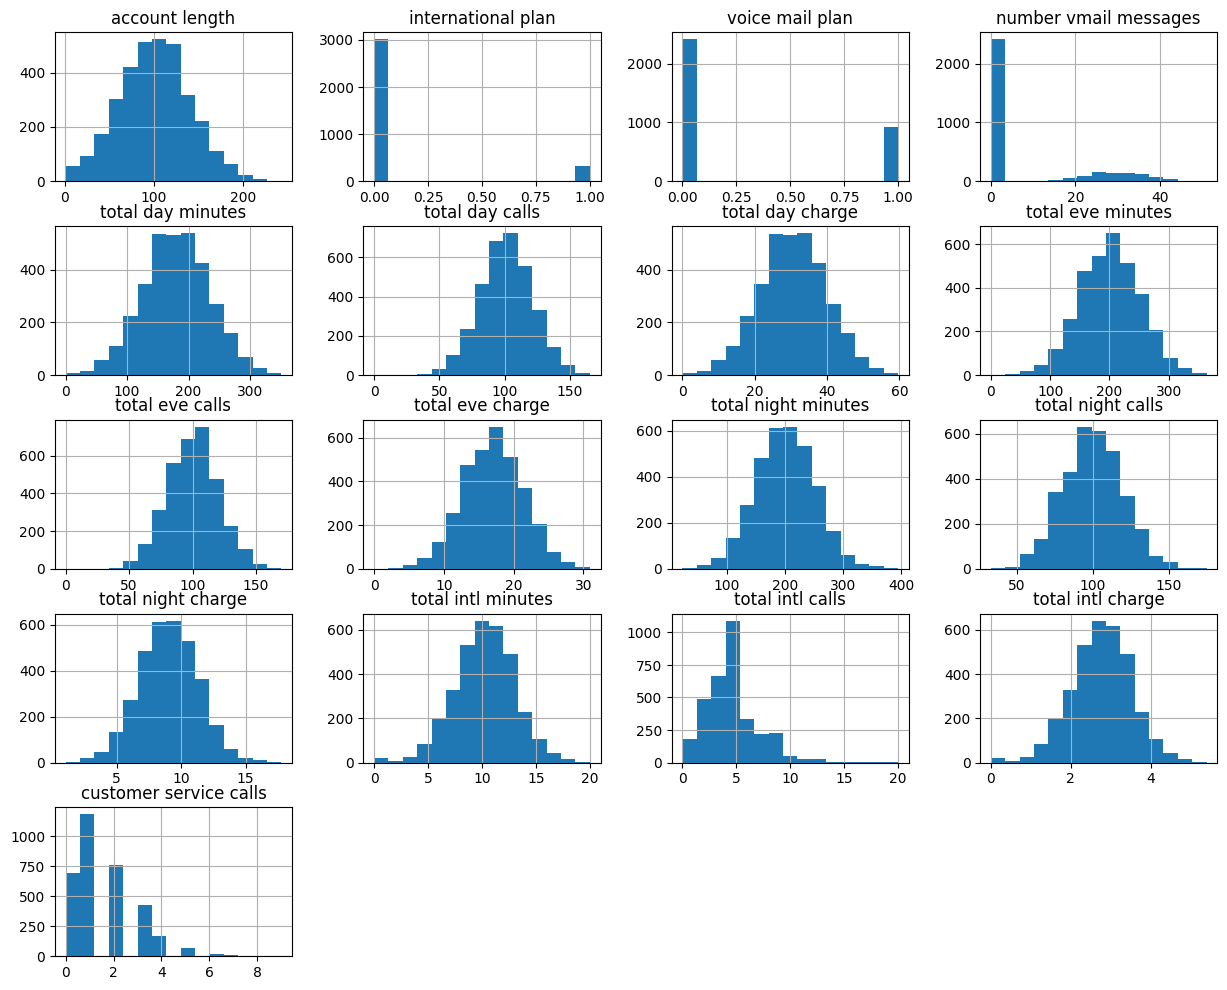

In [12]:
import matplotlib.pyplot as plt

# check distribution of values
df_final.hist(figsize=(15,12),bins = 15)
plt.show()

In [13]:
# check classes ratio
df_final.groupby(['churn'])['churn'].count()

,churn
churn,
False,2850
True,483


The distributions tell us:

1. Most customers don't use voice mail service and international plans.
2. Half of the customers live in area code 415.
3. The company earns more by total day calls (check total day charge).
4. We have an imbalanced dataset which could be tricky when choosing evaluation metrics.

<Axes: >

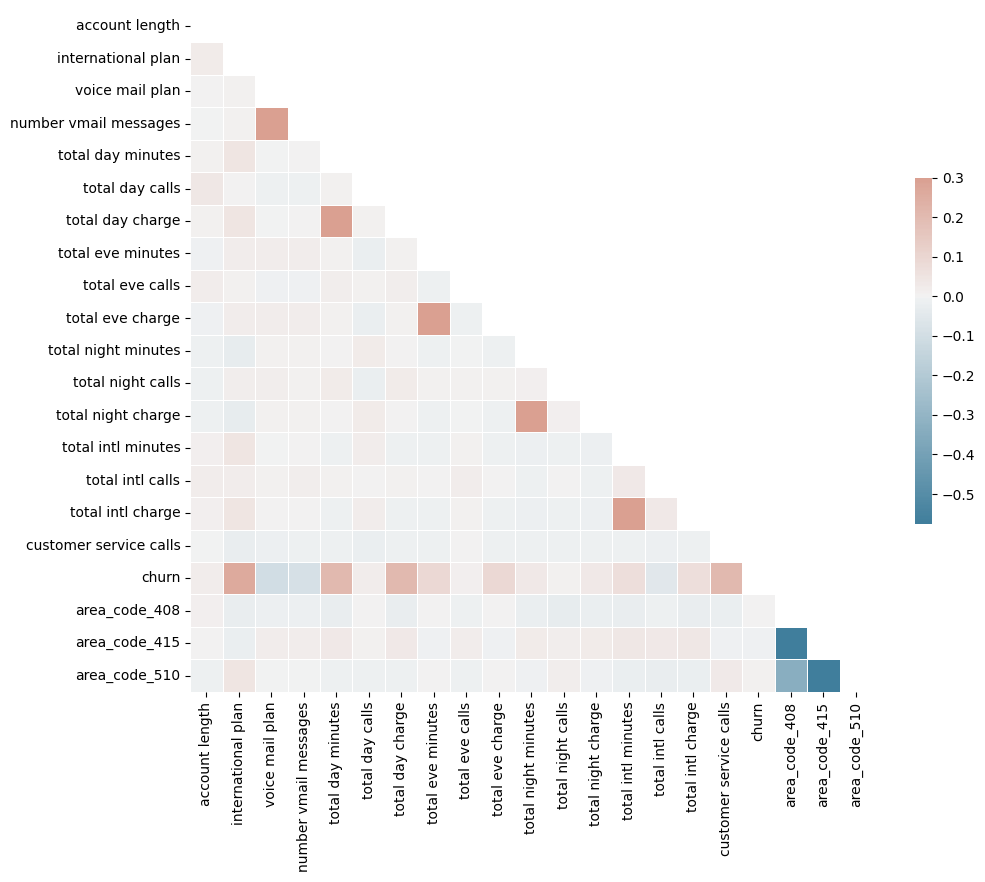

In [15]:
# some insights into the relationship between features
# observe the correlation.

import matplotlib.pyplot as plt
import seaborn as sns

# Generate a mask for the upper triangle
corr = df_final.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


From the correlation matrix, we observe the following things:

**There is a positive correlation between:**

- total day charge, total day minutes, and churn  
- total eve minutes and total eve charge  
- total night minutes and total night charge  
- total intl minutes and total intl charge  
- total customer service calls and churn  
- number vmail messages and voice mail  
- international plan and churn  

**There is a negative correlation between:**

- churn and voice mail plan  
- churn and number vmail messages  
- churn and total intl calls




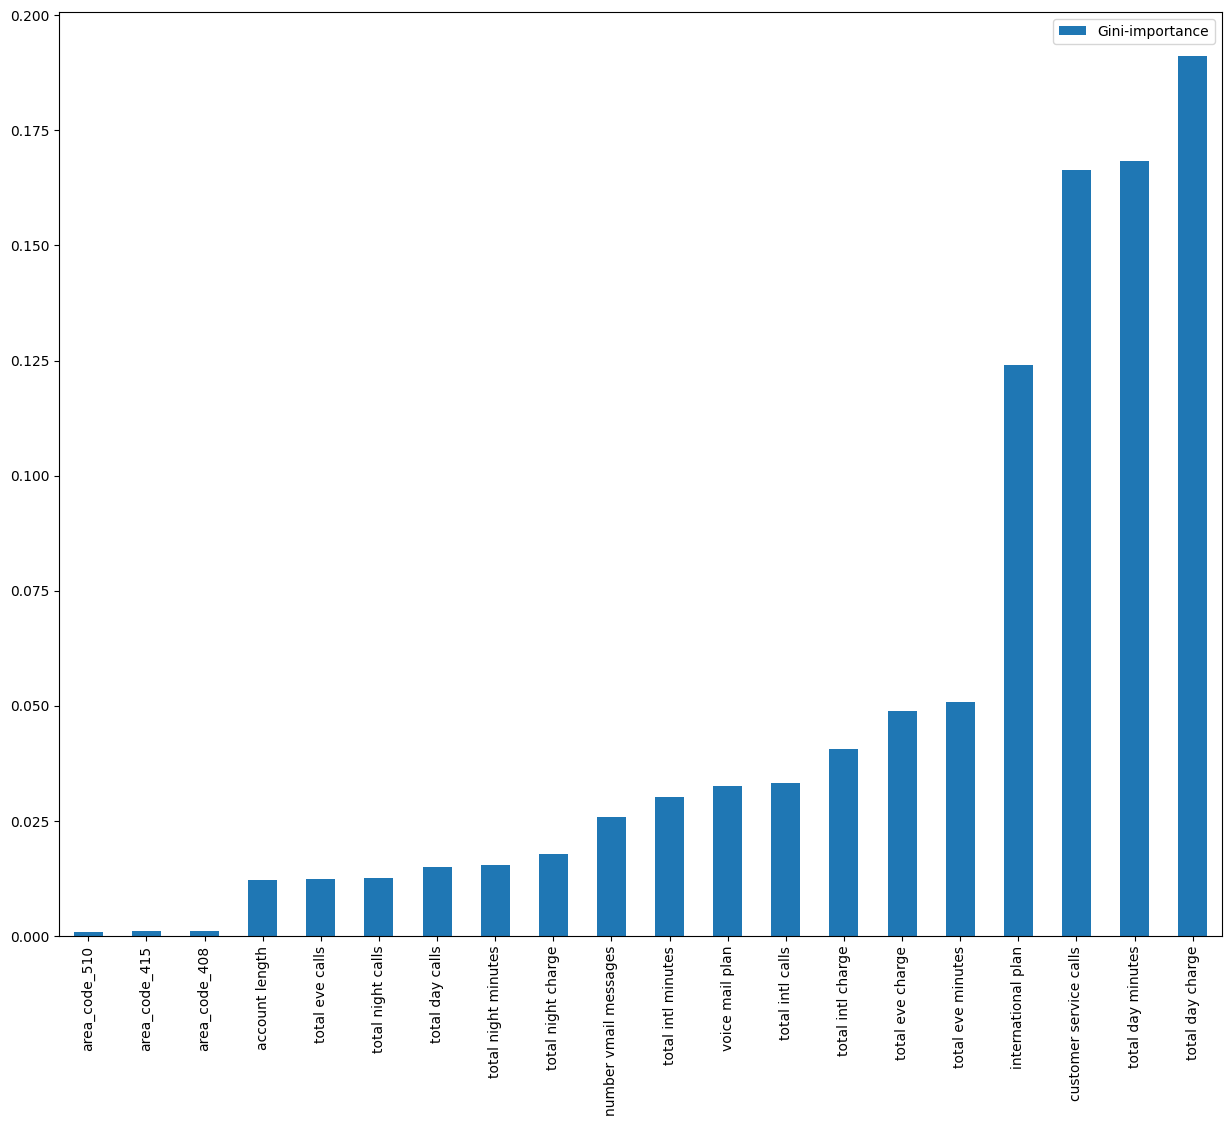

In [16]:
"""check feature importances via random forest classifier"""

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

le = preprocessing.LabelEncoder()
# apply label encoder for churn since its values are also categories
y = le.fit_transform(df_final["churn"])

# drop label column
X = df_final.drop(columns=["churn"])

# train-test split
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# selected features are selected in multicollinearity check part
feature_names = [f"feature {i}" for i in range((X.shape[1]))]
forest =  RandomForestClassifier(max_depth=5)
forest.fit(X_train, y_train)
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(df_final.drop(columns=["churn"]).columns, forest.feature_importances_):
    feats[feature] = importance #add the name/value pair

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=90, figsize=(15,12))
plt.show()

Gini-importance shows us which features would be most useful if we build a tree-based model with given features. According to the analysis above, the most important three features of churn are: total day charge, total day minutes, and customer service calls.

#2. Train/Test Split
In this notebook, we will mostly apply machine learning methods for the given problem. Therefore, we will prefer to use an 80%-20% split since it is used as the most common ratio in applications (not including Deep Learning). Furthermore, we have an imbalanced dataset in terms of class distributions. We can use stratify option of train_test_split( ) function of sklearn to split data to train and test datasets with the same distribution and be sure that samples of the test or train dataset are not only formed by the majority class.

In [17]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
# apply label encoder for churn since its values are also categories
y = le.fit_transform(df_final["churn"])

In [18]:
X = df_final.drop(columns=["churn"])

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#3. Predictive Model

In [20]:
# Apply classifiers and decide to pick one to use in production based on the performance
# Hyperparameters of the given classifiers are chosen as trial-error

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
    "XGBoost",
    "LightGBM"
]

classifiers = [

    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(max_depth=5, random_state=42),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', seed=0),
    LGBMClassifier(random_state=42),
]

#4. Metrics
This is a classification task, and the most commonly used metric is accuracy. But, we have an imbalanced dataset, which means we need to be careful about our evaluations. F1 score balances the precision and recall so we can have a good metric even for imbalanced datasets. Hence, we will use accuracy and the F1 score while comparing the performance of different algorithms.

In [21]:
from sklearn.metrics import f1_score

#5. Model Results
##5.1. Classical Machine Learning Models

In [22]:
for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        acc_score = clf.score(X_test, y_test)
        y_pred = clf.predict(X_test)
        f_score = f1_score(y_test, y_pred, average='macro')
        print("accuracy:", "{:.2f}".format(acc_score), "f1_score:", "{:.2f}".format(f_score), "Model:", name)

accuracy: 0.89 f1_score: 0.72 Model: Nearest Neighbors
accuracy: 0.85 f1_score: 0.46 Model: Linear SVM
accuracy: 0.85 f1_score: 0.46 Model: RBF SVM
accuracy: 0.93 f1_score: 0.85 Model: Gaussian Process
accuracy: 0.94 f1_score: 0.86 Model: Decision Tree
accuracy: 0.90 f1_score: 0.73 Model: Random Forest
accuracy: 0.93 f1_score: 0.85 Model: Neural Net
accuracy: 0.89 f1_score: 0.73 Model: AdaBoost
accuracy: 0.85 f1_score: 0.70 Model: Naive Bayes
accuracy: 0.88 f1_score: 0.75 Model: QDA


/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:43:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


accuracy: 0.96 f1_score: 0.92 Model: XGBoost
[LightGBM] [Info] Number of positive: 382, number of negative: 2284
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000880 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2401
[LightGBM] [Info] Number of data points in the train set: 2666, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.143286 -> initscore=-1.788263
[LightGBM] [Info] Start training from score -1.788263


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


accuracy: 0.95 f1_score: 0.89 Model: LightGBM


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


accuracy: 0.95 f1_score: 0.89


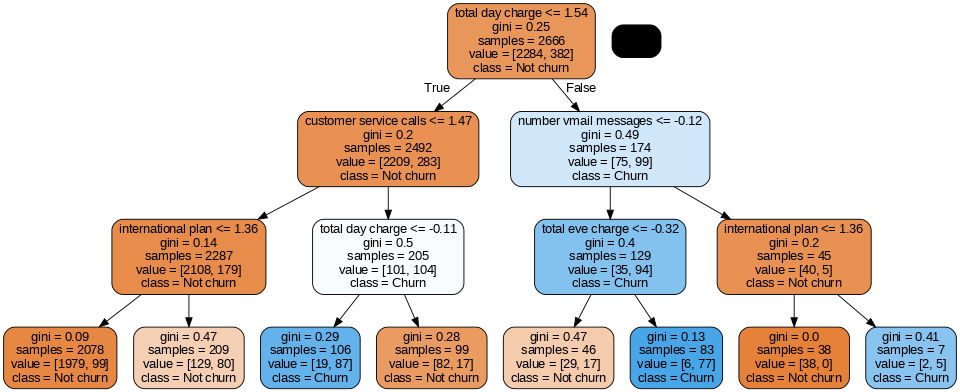

In [23]:
"""visualize the Decision Tree and see how tree-based algorithms decide for this particular problem"""

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import SVG,display, Image
import pydotplus

#Function attributes
#maximum_depth  - depth of tree
#criterion_type - ["gini" or "entropy"]
#split_type     - ["best" or "random"]

def plot_decision_tree(maximum_depth,criterion_type,split_type) :


    #model
    clf = DecisionTreeClassifier(max_depth=3)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print("accuracy:", "{:.2f}".format(acc_score), "f1_score:", "{:.2f}".format(f_score))

    #plot decision tree
    graph = tree.export_graphviz(clf,out_file=None,
                                        rounded=True,proportion = False,
                                        feature_names = df_final.drop(columns=["churn"]).columns.to_list(),
                                        precision  = 2,
                                        class_names=["Not churn","Churn"],
                                        filled = True,

                  )

    pydot_graph = pydotplus.graph_from_dot_data(graph)
    pydot_graph.set_size('"10,10"')
    plt = Image(pydot_graph.create_png())
    display(plt)

plot_decision_tree(3,"gini","best")

##5.2. Deep Learning Model

What would be the performance of Artificial Neural Network (ANN) for the given problem (without spending hours on hyperparameter optimization - just experimenting)?

In [24]:
# sequential model to initialise our ann and dense module to build the layers
from keras.models import Sequential
from keras.layers import Dense
# to have reproducible results
import tensorflow
tensorflow.random.set_seed(42)

classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = X.shape[1]))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN | means applying SGD on the whole ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100,verbose = 0)

loss, accuracy = classifier.evaluate(X_train, y_train,
                            batch_size=10)

print('Train accuracy:', accuracy)
# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

print('*'*20)
loss, accuracy = classifier.evaluate(X_test, y_test,
                            batch_size=10)

print('Test accuracy:', accuracy)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

f1_score = f1_score(y_test, y_pred)
print('Test F1-score:', f1_score)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9162 - loss: 0.2213
Train accuracy: 0.9159789681434631
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
********************
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9167 - loss: 0.2267
Test accuracy: 0.9220389723777771
[[559   7]
 [ 45  56]]
Test F1-score: 0.6829268292682927


The performance of ANN couldn't beat the result of tree-based algorithms. In this case, we can continue with XGBoost as the algorithm will be in production due to it has combination of high accuracy and F1 score.

#6. Deployment Issues
After the deployment of our ML model to production, we need to continue to monitor its performance since it could degrade over time due to internal or external reasons. It is recommended to update our models periodically, such as training with recent data to avoid common problems. There are two significant problems with the MLOps cycle:

- Data drift: Data drift is the situation where the model’s input distribution changes. It could be caused by broken data ingestion or serving pipeline, or a change in the nature of your problem. We can resolve this issue by fixing the broken data engineering pipelines where applicable or by training our model with more data including more recent data points if there is no deterioration in the data quality.

- Concept drift: Concept drift is the situation when the functional relationship between the model inputs and outputs changes. The context has changed, but the model doesn’t know about the change. Its learned patterns do not hold anymore. Hence, we need to learn a new model and even use another algorithm if our particular algorithm's performance is not good enough to use in production.